In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns # for charts
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=ImportWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import svm
import xgboost as xgb
from sklearn.linear_model import Ridge , Lasso , ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("game-rating-data-set-train.csv")


In [3]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/combat-commander...,918293835,Combat Commander RSG,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,8,0.0,NaN,Generate Random Scenarios for Combat Commander...,Michael Kiefte,4+,EN,83041280,Games,"Games, Strategy, Utilities, Board",18/04/2015,26/01/2016,5.0
1,https://apps.apple.com/us/app/outbreak-zombie-...,507880615,Outbreak+ Zombie Escape Puzzle Fun Door Maze S...,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,20,0.0,NaN,Welcome to Outbreak+ The Zombie Escape Puzzle ...,"RoboNacho Systems, LLC",4+,EN,12134715,Games,"Games, Entertainment, Role Playing, Strategy",15/05/2012,2/05/2013,4.0
2,https://apps.apple.com/us/app/forklift-guy-lit...,429886090,Forklift Guy Lite,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,7,0.0,NaN,"""The Forklift Guy is an easy and funny strateg...",Navigation-Info Kft.,4+,EN,10205035,Games,"Games, Puzzle, Strategy",8/04/2011,8/04/2011,3.5
3,https://apps.apple.com/us/app/alien-shooter-td...,1132242499,Alien Shooter TD,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,119,0.0,"0.99, 4.99, 9.99, 10.99, 5.99, 24.99, 19.99, 2...",Be careful when downloading the game: you run ...,Sigma Team,17+,"EN, RU",328424448,Games,"Games, Strategy, Entertainment",7/09/2016,22/01/2019,4.5
4,https://apps.apple.com/us/app/ship-tycoon/id11...,1192606549,Ship Tycoon.,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,81,0.0,"2.99, 4.99, 9.99, 19.99, 49.99, 99.99","""A new game present by TRADEGAME Lab following...",TRADEGAME Lab Inc.,4+,"EN, DE, JA, KO, ZH, ES, ZH",235592704,Games,"Games, Strategy, Role Playing",25/05/2017,7/05/2019,3.5


In [4]:
df.drop(columns=['Subtitle','ID','Name','Icon URL','URL','In-app Purchases','Developer','Languages','Description'], inplace=True)

In [5]:
df['Age Rating'] = df['Age Rating'].str.replace('+', '').astype(int)

In [6]:
import pandas as pd
import re

categories = ['Games', 'Entertainment', 'Education', 'Utilities', 'Sports', 'Reference', 
              'Productivity', 'Finance', 'Book', 'Social Networking', 'News', 'Health & Fitness', 
              'Lifestyle', 'Stickers', 'Business', 'Music', 'Strategy', 'Puzzle', 'Action', 
              'Simulation', 'Role Playing', 'Board']

for category in categories:
    df[category] = None  # or you can specify any default value you want

# Regular expression pattern to match any of the categories
pattern = '|'.join(categories)

# Function to mark found words
def mark_categories(row):
    for category in categories:
        if re.search(category, row['Primary Genre']) or re.search(category, row['Genres']):
            row[category] = 1
        else:
            row[category] = 0
    return row

# Apply the function to each row
df = df.apply(mark_categories, axis=1)

print(df)

      User Rating Count  Price  Age Rating       Size Primary Genre  \
0                     8   0.00           4   83041280         Games   
1                    20   0.00           4   12134715         Games   
2                     7   0.00           4   10205035         Games   
3                   119   0.00          17  328424448         Games   
4                    81   0.00           4  235592704         Games   
...                 ...    ...         ...        ...           ...   
3710             205014   0.99          12  118793216         Games   
3711                252   0.00           4   79267840         Games   
3712                 12   0.00           4   19513344     Utilities   
3713                578   0.00           9  275680256         Games   
3714                782   0.00           4   85438464         Games   

                                            Genres Original Release Date  \
0                Games, Strategy, Utilities, Board            18/04/201

In [7]:
df.drop(['Primary Genre', 'Genres'], axis=1, inplace=True)

In [8]:

# Extracting year and converting to integer
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'], format='%d/%m/%Y').dt.year.astype(int)
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'], format='%d/%m/%Y').dt.year.astype(int)

print(df)

      User Rating Count  Price  Age Rating       Size  Original Release Date  \
0                     8   0.00           4   83041280                   2015   
1                    20   0.00           4   12134715                   2012   
2                     7   0.00           4   10205035                   2011   
3                   119   0.00          17  328424448                   2016   
4                    81   0.00           4  235592704                   2017   
...                 ...    ...         ...        ...                    ...   
3710             205014   0.99          12  118793216                   2012   
3711                252   0.00           4   79267840                   2015   
3712                 12   0.00           4   19513344                   2012   
3713                578   0.00           9  275680256                   2016   
3714                782   0.00           4   85438464                   2012   

      Current Version Release Date  Ave

In [9]:
df.head()

,User Rating Count,Price,Age Rating,Size,Original Release Date,Current Version Release Date,Average User Rating,Games,Entertainment,Education,...,Lifestyle,Stickers,Business,Music,Strategy,Puzzle,Action,Simulation,Role Playing,Board
0,8,0.0,4,83041280,2015,2016,5.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,20,0.0,4,12134715,2012,2013,4.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,7,0.0,4,10205035,2011,2011,3.5,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,119,0.0,17,328424448,2016,2019,4.5,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,81,0.0,4,235592704,2017,2019,3.5,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:

df['Games Age'] = df['Current Version Release Date'] - df['Original Release Date']

In [11]:
df.head()

,User Rating Count,Price,Age Rating,Size,Original Release Date,Current Version Release Date,Average User Rating,Games,Entertainment,Education,...,Stickers,Business,Music,Strategy,Puzzle,Action,Simulation,Role Playing,Board,Games Age
0,8,0.0,4,83041280,2015,2016,5.0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
1,20,0.0,4,12134715,2012,2013,4.0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
2,7,0.0,4,10205035,2011,2011,3.5,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,119,0.0,17,328424448,2016,2019,4.5,1,1,0,...,0,0,0,1,0,0,0,0,0,3
4,81,0.0,4,235592704,2017,2019,3.5,1,0,0,...,0,0,0,1,0,0,0,1,0,2


In [12]:
df.drop(['Original Release Date', 'Current Version Release Date'], axis=1, inplace=True)

In [13]:
df.head()

,User Rating Count,Price,Age Rating,Size,Average User Rating,Games,Entertainment,Education,Utilities,Sports,...,Stickers,Business,Music,Strategy,Puzzle,Action,Simulation,Role Playing,Board,Games Age
0,8,0.0,4,83041280,5.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1,20,0.0,4,12134715,4.0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,7,0.0,4,10205035,3.5,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,119,0.0,17,328424448,4.5,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,81,0.0,4,235592704,3.5,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2


In [14]:
df.drop(['Price', 'Music','Strategy','Business','Stickers','Size'], axis=1, inplace=True)
# df['Price']=df['Price'].map(lambda x: 0 if x == 0.00 else 1)

In [16]:

# min_size = df['Size'].min()
# max_size = df['Size'].max()
# df['Size'] = (df['Size'] - min_size) / (max_size - min_size)

In [17]:
y = df.pop("Average User Rating")
x=df
x.columns = x.columns.astype(str)

In [18]:
model= []
model_mse = []

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

# Make predictions
lreg_y_pred = lreg.predict(X_test)

# Assuming y_true and y_pred are your true values and predicted values
mse = mean_squared_error(y_test, lreg_y_pred)

# Print and save the accuracy
print(f"Linear Regression Mean Squared Error: {mse}")
model.append("Linear Regression")
model_mse.append(mse)

Linear Regression Mean Squared Error: 0.5650478284468609


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)
# Make predictions on the test data
gb_regressor_y_pred = gb_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, gb_regressor_y_pred)
model.append("Gradient Boosting")
model_mse.append(mse)
print(f"Gradient Boosting Mean Squared Error (MSE): {mse}")

Gradient Boosting Mean Squared Error (MSE): 0.5457775690140075


In [22]:
xgb_regressor = xgb.XGBRegressor()
# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test data
xgb_regressor_y_pred = xgb_regressor.predict(X_test)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, xgb_regressor_y_pred)
model.append("xgb")
model_mse.append(mse)
print(f"XGB Mean Squared Error (MSE): {mse}")

XGB Mean Squared Error (MSE): 0.6320783505999301


In [23]:
# svr_regressor = svm.SVR(kernel='linear', C=1.0)

# # Fit the model to the training data
# svr_regressor.fit(X_train, y_train.ravel())  # Note: ravel() is used to convert y_train to a 1D array

# # Make predictions on the test data
# svr_regressor_y_pred = svr_regressor.predict(X_test)
# # Calculate the Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, svr_regressor_y_pred)
# model.append("SVR")
# model_mse.append(mse)
# print(f"SVR Mean Squared Error (MSE): {mse}")

In [24]:
rf_regressor = RandomForestRegressor()
# n_estimators=100, random_state=42
# Fit the model to the training data
rf_regressor.fit(X_train, y_train.ravel())  # Note: ravel() is used to convert y_train to a 1D array

# Make predictions on the test data
rf_regressor_y_pred = rf_regressor.predict(X_test)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_regressor_y_pred)
model.append(" Random Forest Regression")
model_mse.append(mse)
print(f" Random Forest Regression Mean Squared Error (MSE): {mse}")

 Random Forest Regression Mean Squared Error (MSE): 0.6366860418652608


In [25]:
# Create a Ridge Regression model
alpha = 1.0  # Regularization strength (adjust this hyperparameter)
ridge_regressor = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_regressor.fit(X_train, y_train)

# Make predictions on the test data
ridge_regressor_y_pred = ridge_regressor.predict(X_test)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ridge_regressor_y_pred)
model.append(" Ridge Regression")
model_mse.append(mse)

print(f"Ridge Regression Mean Squared Error (MSE): {mse}")

Ridge Regression Mean Squared Error (MSE): 0.5646200640863505


In [26]:
from catboost import CatBoostRegressor
# Create and train the CatBoostRegressor model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
model.append(" CatBoost")
model_mse.append(mse)
# Calculate Mean Squared Error (MSE) on the test set
print(f"CatBoost MSE on Test Set: {mse}")

Learning rate set to 0.048632
0:	learn: 0.7499946	total: 114ms	remaining: 1m 53s
1:	learn: 0.7480757	total: 115ms	remaining: 57.5s
2:	learn: 0.7457129	total: 117ms	remaining: 38.8s
3:	learn: 0.7442370	total: 118ms	remaining: 29.4s
4:	learn: 0.7425587	total: 119ms	remaining: 23.7s
5:	learn: 0.7411090	total: 120ms	remaining: 19.9s
6:	learn: 0.7392522	total: 122ms	remaining: 17.2s
7:	learn: 0.7377812	total: 123ms	remaining: 15.2s
8:	learn: 0.7361587	total: 124ms	remaining: 13.6s
9:	learn: 0.7346904	total: 125ms	remaining: 12.4s
10:	learn: 0.7334106	total: 126ms	remaining: 11.3s
11:	learn: 0.7322879	total: 127ms	remaining: 10.5s
12:	learn: 0.7313110	total: 129ms	remaining: 9.76s
13:	learn: 0.7303439	total: 130ms	remaining: 9.13s
14:	learn: 0.7295742	total: 131ms	remaining: 8.58s
15:	learn: 0.7286619	total: 132ms	remaining: 8.11s
16:	learn: 0.7279595	total: 133ms	remaining: 7.69s
17:	learn: 0.7271820	total: 134ms	remaining: 7.32s
18:	learn: 0.7266097	total: 135ms	remaining: 6.98s
19:	learn:

In [27]:
params = {
    'objective': 'regression',  # 'regression' for regression tasks
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'metric': 'mse',           # Mean Squared Error (MSE) as the evaluation metric
    'num_leaves': 31,          # Number of leaves in each tree
    'learning_rate': 0.05,     # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to be used in each iteration
    'bagging_fraction': 0.8,  # Fraction of data to be used in each iteration (bagging)
    'bagging_freq': 5,         # Frequency of bagging
    'verbose': 0               # Control the level of verbosity (0 for no output)
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds (iterations)
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
bst = lgb.train(params, train_data, num_round)

# Make predictions on the test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
model.append("lightgbm")
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
model_mse.append(mse)
print(f"lightgbm Mean Squared Error (MSE): {mse}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
lightgbm Mean Squared Error (MSE): 0.5542067117217814


In [28]:
alpha = 1.0  # Regularization strength (adjust this hyperparameter)
lasso_regressor = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_regressor.fit(X_train, y_train)

# Make predictions on the test data
lasso_regressor_y_pred = lasso_regressor.predict(X_test)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lasso_regressor_y_pred)
model.append(" Lasso Regression")
model_mse.append(mse)

print(f"Lasso Regression Mean Squared Error (MSE): {mse}")

Lasso Regression Mean Squared Error (MSE): 0.5686577878673615


In [29]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_elastic_net)
model.append(" elastic_net")
model_mse.append(mse)

print(f"elastic net Mean Squared Error (MSE): {mse}")

elastic net Mean Squared Error (MSE): 0.5686576950614419


In [30]:
huber_regression = HuberRegressor(epsilon=1.35)  # Adjust epsilon as needed
huber_regression.fit(X_train, y_train)
y_pred_huber = huber_regression.predict(X_test)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_huber)
model.append(" Huber Regression")
model_mse.append(mse)

print(f"Huber Regressor Mean Squared Error (MSE): {mse}")

Huber Regressor Mean Squared Error (MSE): 0.7764515309424764


In [31]:
sorted_mse_values, sorted_model_names = zip(*sorted(zip(model_mse, model)))
best_three_models = sorted_model_names[:3]
best_three_mses = sorted_mse_values[:3]


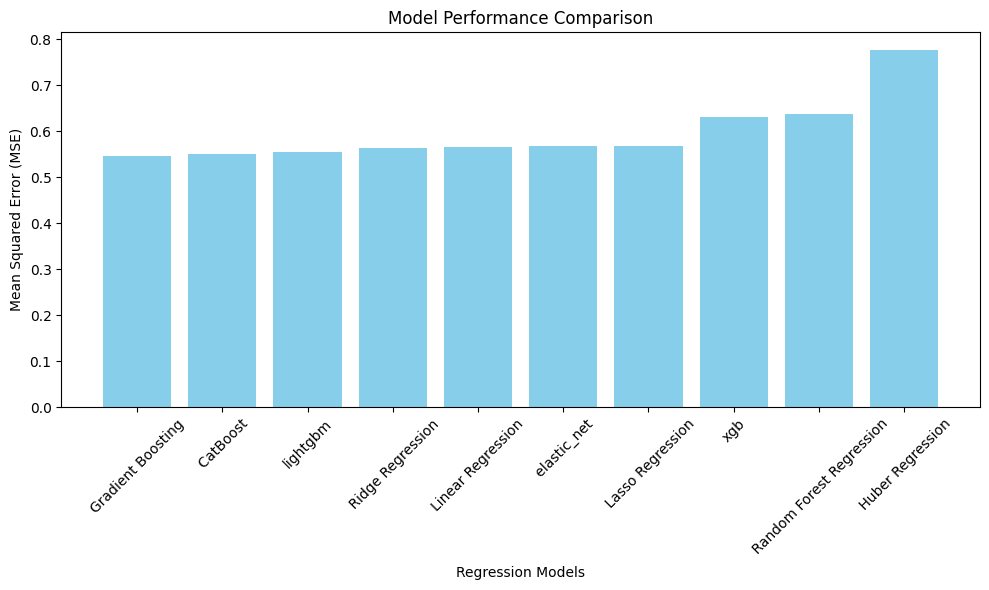

In [32]:

plt.figure(figsize=(10, 6))
plt.bar(sorted_model_names, sorted_mse_values, color='skyblue')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [33]:
print("Best Three Models:")
for model, mse in zip(best_three_models, best_three_mses):
    print(f"{model}: MSE = {mse}")

Best Three Models:
Gradient Boosting: MSE = 0.5457775690140075
 CatBoost: MSE = 0.550261095222687
lightgbm: MSE = 0.5542067117217814


In [34]:
df = pd.read_csv("game-rating-data-set_test.csv")
id=df['ID']

In [35]:
df.drop(columns=['Subtitle','ID','Name','Icon URL','URL','In-app Purchases','Developer','Languages','Description'], inplace=True)
df['Age Rating'] = df['Age Rating'].str.replace('+', '').astype(int)

In [36]:
categories = ['Games', 'Entertainment', 'Education', 'Utilities', 'Sports', 'Reference', 
              'Productivity', 'Finance', 'Book', 'Social Networking', 'News', 'Health & Fitness', 
              'Lifestyle', 'Stickers', 'Business', 'Music', 'Strategy', 'Puzzle', 'Action', 
              'Simulation', 'Role Playing', 'Board']

for category in categories:
    df[category] = None  # or you can specify any default value you want

# Regular expression pattern to match any of the categories
pattern = '|'.join(categories)

# Function to mark found words
def mark_categories(row):
    for category in categories:
        if re.search(category, row['Primary Genre']) or re.search(category, row['Genres']):
            row[category] = 1
        else:
            row[category] = 0
    return row

# Apply the function to each row
df = df.apply(mark_categories, axis=1)

print(df)


      User Rating Count  Price  Age Rating       Size Primary Genre  \
0                   982   0.00          12  894489600         Games   
1                    19   0.00          12  116407296         Games   
2                    14   0.00           4   50647040         Games   
3                    88   1.99           9   28120064         Games   
4                    13   3.99          12   39915520         Games   
...                 ...    ...         ...        ...           ...   
1494                102   0.00           9   16554609         Games   
1495                  6   0.00           4  145723392         Games   
1496                 47   0.00          17   31295488        Sports   
1497                776   0.00           4   64505856         Games   
1498                161   0.00           9   24142820         Games   

                                         Genres Original Release Date  \
0                 Games, Role Playing, Strategy             6/03/2018   
1

In [37]:
df.drop(['Primary Genre', 'Genres'], axis=1, inplace=True)# Extracting year and converting to integer
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'], format='%d/%m/%Y').dt.year.astype(int)
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'], format='%d/%m/%Y').dt.year.astype(int)

print(df)


      User Rating Count  Price  Age Rating       Size  Original Release Date  \
0                   982   0.00          12  894489600                   2018   
1                    19   0.00          12  116407296                   2013   
2                    14   0.00           4   50647040                   2013   
3                    88   1.99           9   28120064                   2011   
4                    13   3.99          12   39915520                   2017   
...                 ...    ...         ...        ...                    ...   
1494                102   0.00           9   16554609                   2011   
1495                  6   0.00           4  145723392                   2014   
1496                 47   0.00          17   31295488                   2012   
1497                776   0.00           4   64505856                   2009   
1498                161   0.00           9   24142820                   2011   

      Current Version Release Date  Gam

In [39]:
df['Games Age'] = df['Current Version Release Date'] - df['Original Release Date']
# df['Price']=df['Price'].map(lambda x: 0 if x == 0.00 else 1)
# min_size = df['Size'].min()
# max_size = df['Size'].max()
# df['Size'] = (df['Size'] - min_size) / (max_size - min_size)



In [40]:
df.drop(['Original Release Date', 'Current Version Release Date'], axis=1, inplace=True)
df.drop(['Price', 'Music','Strategy','Business','Stickers','Size'], axis=1, inplace=True)
